# Sentiment Analysis of Public Health Tweets for Early Disease Outbreak Detection
### Jalnar Ali Alshehri 

## Data Collection

In [3]:
!pip install vaderSentiment

In [4]:
!pip install emoji

In [5]:
!pip install pyLDAvis

In [2]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import emoji
import matplotlib.pyplot as plt
from nltk import pos_tag
from nltk.corpus import wordnet
import gensim
from gensim import corpora
from collections import Counter
from gensim.models.ldamodel import LdaModel
from ast import literal_eval
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from gensim import corpora, models
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jalna\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jalna\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jalna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jalna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jalna\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\jalna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nl

True

In [15]:
# Load Dataset
file_path = r'C:\Users\jalna\Downloads\covid19_tweets.csv\covid19_tweets.csv'
#file_path ='/Users/BushraAsiri/Downloads/covid19_tweets.csv'
dataset = pd.read_csv(file_path)

# Transform the dataset to pandas dataframe
data = pd.DataFrame(dataset)

# Display the first 5 rows of the dataset
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [17]:
data.shape

(179108, 13)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


In [21]:
# needed column
important_columns = ['text','date','user_location','hashtags']

data_tweet = data[important_columns]

# result
data_tweet.head()

,text,date,user_location,hashtags
0,If I smelled the scent of hand sanitizers toda...,2020-07-25 12:27:21,astroworld,NaN
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,2020-07-25 12:27:17,"New York, NY",NaN
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,2020-07-25 12:27:14,"Pewee Valley, KY",['COVID19']
3,@brookbanktv The one gift #COVID19 has give me...,2020-07-25 12:27:10,Stuck in the Middle,['COVID19']
4,25 July : Media Bulletin on Novel #CoronaVirus...,2020-07-25 12:27:08,Jammu and Kashmir,"['CoronaVirusUpdates', 'COVID19']"


## Data Preprocessing

In [31]:
# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# POS mapping
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Clean, tokens, lemmatize, stem
def clean_and_tokenize(text):
    text = emoji.replace_emoji(text, replace='') # Remove emojies 
    text = re.sub(r"http\S+|www\S+|https\S+", '', text) # Remove URLs
    text = re.sub(r"@\w+", '', text) # Remove mentions
    text = text.replace("#", "") # Remove hashtag symbol only
    text = re.sub(r"\d+", '', text) # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation)) # Remove punctuation
    text = text.lower() # Convert text to lowercase
    tokens = word_tokenize(text) # Tokenazations 
    pos_tags = pos_tag(tokens)
    # Lemmatization and stemming
    stemmed_tokens = [
        stemmer.stem(lemmatizer.lemmatize(token, get_wordnet_pos(pos)))
        for token, pos in pos_tags
        if token not in stop_words and token.isalpha()
    ]
    return stemmed_tokens

data_tweet['tokens'] = data_tweet['text'].apply(clean_and_tokenize)
data_tweet['clean_text'] = data_tweet['tokens'].apply(lambda x: ' '.join(x))

C:\Users\jalna\AppData\Local\Temp\ipykernel_4696\1251194320.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet['tokens'] = data_tweet['text'].apply(clean_and_tokenize)
C:\Users\jalna\AppData\Local\Temp\ipykernel_4696\1251194320.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet['clean_text'] = data_tweet['tokens'].apply(lambda x: ' '.join(x))


In [32]:
data_tweet.head(10)

,text,date,user_location,hashtags,tokens,clean_text
0,If I smelled the scent of hand sanitizers toda...,2020-07-25 12:27:21,astroworld,NaN,"[smell, scent, hand, sanit, today, someon, pas...",smell scent hand sanit today someon past would...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,2020-07-25 12:27:17,"New York, NY",NaN,"[hey, wouldnt, make, sens, player, pay, respect]",hey wouldnt make sens player pay respect
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,2020-07-25 12:27:14,"Pewee Valley, KY",['COVID19'],"[trump, never, claim, covid, hoax, claim, effort]",trump never claim covid hoax claim effort
3,@brookbanktv The one gift #COVID19 has give me...,2020-07-25 12:27:10,Stuck in the Middle,['COVID19'],"[one, gift, covid, give, appreci, simpl, thing...",one gift covid give appreci simpl thing alway ...
4,25 July : Media Bulletin on Novel #CoronaVirus...,2020-07-25 12:27:08,Jammu and Kashmir,"['CoronaVirusUpdates', 'COVID19']","[juli, medium, bulletin, novel, coronavirusupd...",juli medium bulletin novel coronavirusupd covid
5,#coronavirus #covid19 deaths continue to rise....,2020-07-25 12:27:06,Новоро́ссия,"['coronavirus', 'covid19']","[coronaviru, covid, death, continu, rise, almo...",coronaviru covid death continu rise almost bad...
6,How #COVID19 Will Change Work in General (and ...,2020-07-25 12:27:03,"Gainesville, FL","['COVID19', 'Recruiting']","[covid, chang, work, gener, recruit, specif, via]",covid chang work gener recruit specif via
7,You now have to wear face coverings when out s...,2020-07-25 12:27:00,NaN,NaN,"[wear, face, cover, shop, includ, visit, local...",wear face cover shop includ visit local commun
8,Praying for good health and recovery of @Chouh...,2020-07-25 12:26:59,NaN,"['covid19', 'covidPositive']","[pray, good, health, recoveri, covid, covidposit]",pray good health recoveri covid covidposit
9,POPE AS GOD - Prophet Sadhu Sundar Selvaraj. W...,2020-07-25 12:26:54,👇🏻location at link below👇🏻,"['HurricaneHanna', 'COVID19']","[pope, god, prophet, sadhu, sundar, selvaraj, ...",pope god prophet sadhu sundar selvaraj watch h...


In [33]:
print(data_tweet['clean_text'].head(10))

0    smell scent hand sanit today someon past would...
1             hey wouldnt make sens player pay respect
2            trump never claim covid hoax claim effort
3    one gift covid give appreci simpl thing alway ...
4      juli medium bulletin novel coronavirusupd covid
5    coronaviru covid death continu rise almost bad...
6            covid chang work gener recruit specif via
7       wear face cover shop includ visit local commun
8           pray good health recoveri covid covidposit
9    pope god prophet sadhu sundar selvaraj watch h...
Name: clean_text, dtype: object


In [39]:
#  Function to check if the text contains Arabic characters
def contains_arabic(text):
    arabic_pattern = re.compile('[\u0600-\u06FF]')
    return bool(arabic_pattern.search(str(text)))

# Apply the function
data_tweet['has_arabic'] = data_tweet['text'].apply(contains_arabic)

# result
arabic_count = data_tweet['has_arabic'].sum()
english_count = len(data_tweet) - arabic_count

print(f"Rows with Arabic text: {arabic_count}")
print(f"Rows with only English: {english_count}")

#Display the first few rows that contain Arabic
arabic_rows = data_tweet[data_tweet['has_arabic'] == True]
arabic_rows.head()

Rows with Arabic text: 126
Rows with only English: 178982


C:\Users\jalna\AppData\Local\Temp\ipykernel_4696\3284491306.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet['has_arabic'] = data_tweet['text'].apply(contains_arabic)


,text,date,user_location,hashtags,tokens,clean_text,has_arabic
65,This video had me in stitches\nhttps://t.co/ta...,2020-07-25 12:25:21,"England, United Kingdom","['obesity', 'زواج_راكان_الحربي', 'carryminati'...","[video, stitch, obes, زواجراكانالحربي, carrymi...",video stitch obes زواجراكانالحربي carryminati,True
779,...But I follow back 🎶\n#RihannaXTiwa #already...,2020-07-25 12:02:54,Nigeria,"['RihannaXTiwa', 'alreadyvideo', 'TachaDanceCh...","[follow, back, rihannaxtiwa, alreadyvideo, tac...",follow back rihannaxtiwa alreadyvideo tachadan...,True
2694,I can’t see this alone Guys 😭😭 #alreadyvideo #...,2020-07-25 10:52:28,NaN,"['alreadyvideo', 'هيون_الغماس', 'carryminati',...","[see, alon, guy, alreadyvideo, هيونالغماس, car...",see alon guy alreadyvideo هيونالغماس carrymina...,True
3025,#punjab\n#عوام_کی_جیت_کا_دن\n#cricket\n#covid1...,2020-07-25 10:39:22,Capital Of Pakistan,"['punjab', 'عوام_کی_جیت_کا_دن', 'cricket', 'co...","[punjab, عوامکیجیتکادن, cricket, covid, polio,...",punjab عوامکیجیتکادن cricket covid polio pande...,True
3111,"Iran reports 2,316 new #COVID19 cases along wi...",2020-07-25 10:35:06,NaN,['COVID19'],"[iran, report, new, covid, case, along, new, d...",iran report new covid case along new death,True


In [41]:
# Remove rows that contain Arabic text
data_tweet = data_tweet[data_tweet['has_arabic'] == False]

 Removing Arabic Text Rows

Since only 126 rows (less than 0.1%) in the dataset contained Arabic text, we decided to remove them to keep the dataset focused on English content.  
We applied a simple filter using the has_arabic column, keeping only the rows where has_arabic is False.  
This ensures consistency and avoids adding noise to the sentiment analysis and topic modeling processes.

In [44]:
data_tweet.isnull().sum()

text                 0
date                 0
user_location    36725
hashtags         51330
tokens               0
clean_text           0
has_arabic           0
dtype: int64

In [46]:
# Calculate missing values percentage
missing_percentage = (data_tweet.isnull().sum() / len(data_tweet)) * 100
# Display result
print(missing_percentage)

text              0.000000
date              0.000000
user_location    20.518823
hashtags         28.678862
tokens            0.000000
clean_text        0.000000
has_arabic        0.000000
dtype: float64


In [48]:
# Fill missing hashtags with 'no_hashtag'
data_tweet['hashtags'] = data_tweet['hashtags'].apply(lambda x: eval(x) if isinstance(x, str) else x)
data_tweet['hashtags'] = data_tweet['hashtags'].apply(lambda x: x if isinstance(x, list) else ['no_hashtag'])

# Fill missing user_location with 'unknown'
data_tweet['user_location'] = data_tweet['user_location'].fillna('unknown')

data_tweet.isnull().sum()

text             0
date             0
user_location    0
hashtags         0
tokens           0
clean_text       0
has_arabic       0
dtype: int64

In [49]:
print(data_tweet['date'].dtype == 'datetime64[ns]')

False


In [50]:
data_tweet['date'] = pd.to_datetime(data_tweet['date'])
print(type(data_tweet['date'].iloc[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


# Exploratory Data Analysis (EDA)

## Identify common keywords

In [53]:
# Flatten all tokens
all_tokens = [token for tokens in data_tweet['tokens'] for token in tokens]

# Count frequency
keyword_counts = Counter(all_tokens)

# Extract top 20
common_words_with_counts = keyword_counts.most_common(20)

# Convert to DataFrame
common_words_df = pd.DataFrame(common_words_with_counts, columns=['Word', 'Frequency'])

# Display
print(common_words_df)

          Word  Frequency
0        covid     111070
1         case      20413
2          new      14868
3   coronaviru      14236
4          amp      11942
5        death      10006
6         test       9680
7        peopl       9454
8       pandem       8126
9            u       7942
10         get       7655
11      report       6783
12        mask       6743
13         day       6157
14         say       5988
15          go       5830
16        need       5715
17       posit       5344
18         one       5337
19      health       5230


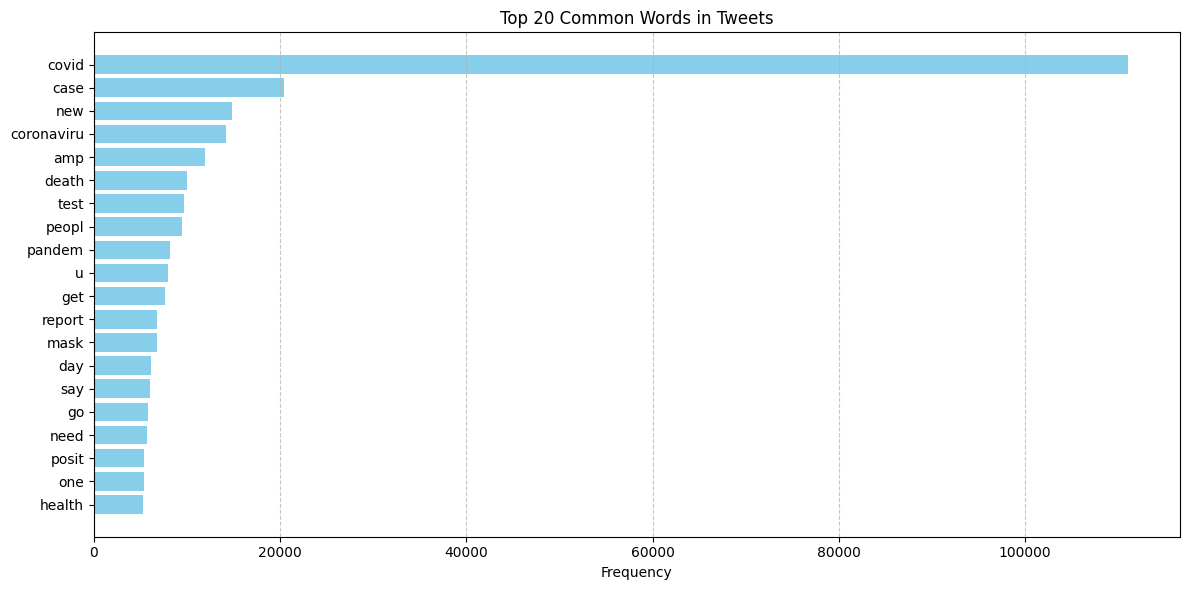

In [54]:
# Separate words and counts into two lists
words = [word for word, count in common_words_with_counts]
counts = [count for word, count in common_words_with_counts]

# Plotting
plt.figure(figsize=(12, 6))
plt.barh(words[::-1], counts[::-1], color='skyblue')  # Corrected: words[::-1] and counts[::-1]
plt.xlabel('Frequency')
plt.title('Top 20 Common Words in Tweets')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Identify Common Hashtags

In [56]:
# Flatten all hashtags
all_hashtags = [tag.lower() for tags in data_tweet['hashtags'] for tag in tags if isinstance(tag, str)]

# Count frequency
hashtag_counts = Counter(all_hashtags)

# Extract top 20
common_hashtags_with_counts = hashtag_counts.most_common(20)

# Convert to DataFrame
common_hashtags_df = pd.DataFrame(common_hashtags_with_counts, columns=['Hashtag', 'Frequency'])

# Display
print(common_hashtags_df)

                Hashtag  Frequency
0               covid19     100217
1            no_hashtag      51330
2           coronavirus      10176
3              pandemic       1623
4                 covid       1299
5                 india       1193
6                corona       1160
7                 trump       1101
8              lockdown        962
9   coronaviruspandemic        880
10             covid_19        826
11            wearamask        799
12    coronavirusupdate        721
13               odisha        707
14              vaccine        703
15                china        544
16    indiafightscorona        538
17   coronavirusupdates        521
18             staysafe        495
19                  usa        483


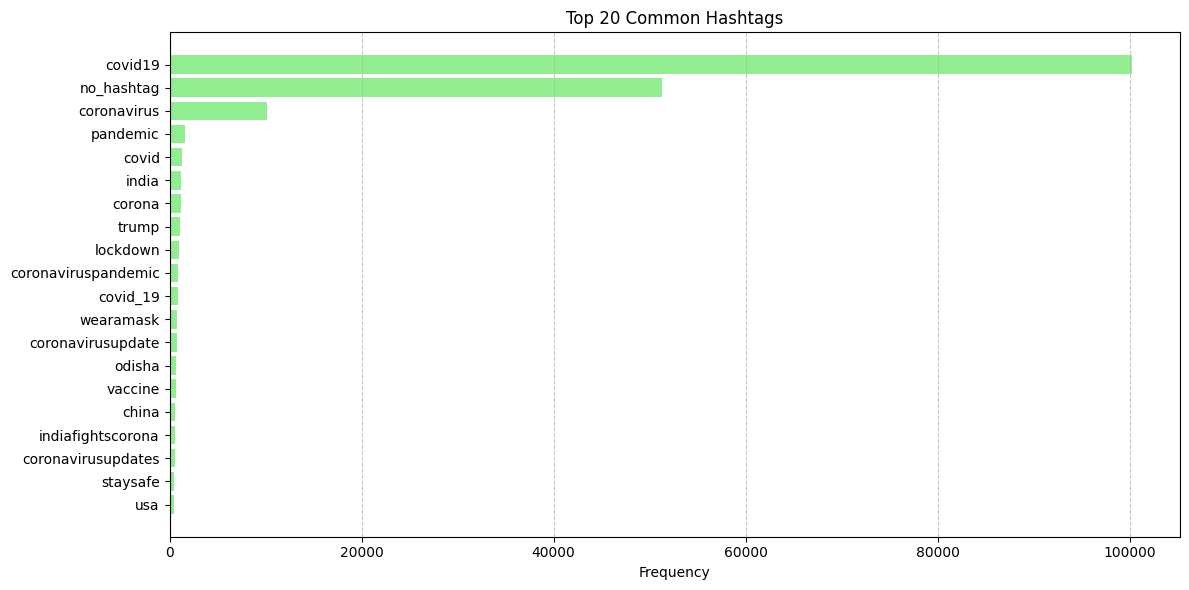

In [61]:
# Plotting
plt.figure(figsize=(12, 6))
plt.barh(common_hashtags_df['Hashtag'][::-1], common_hashtags_df['Frequency'][::-1], color='lightgreen')
plt.xlabel('Frequency')
plt.title('Top 20 Common Hashtags')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Identify Trends Over Time

### Health-Related Tweets Over Time (Daily + Moving Average)

In [67]:
health_keywords = [
    'covid',
    'covid19',
    'coronavirus',
    'pandemic',
    'vaccine',
    'health',
    'infection',
    'staysafe',
    'wearamask',
    'coronaviruspandemic',
    'coronavirusupdate',
    'coronavirusupdates',
    'posit',   # shortened from positive (positive covid test)
    'mask',
    'death',
    'flu',     
    'sick',    # general health state
    'test',    # covid test
    'indiafightscorona', # india corona related
]

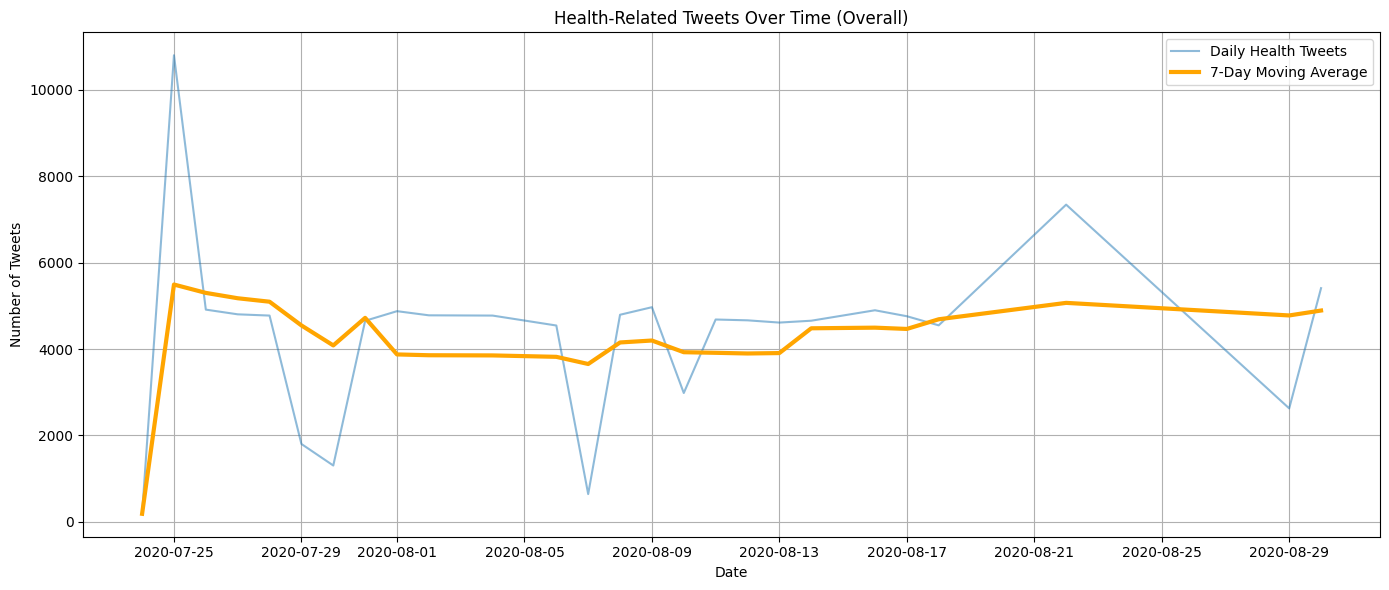

In [69]:
# Function to check if a tweet contains any health-related keyword
def contains_health_keywords(text):
    return any(word in text.split() for word in health_keywords)

# Apply the keyword check
data_tweet['has_health_keywords'] = data_tweet['clean_text'].apply(contains_health_keywords)

# Filter only health-related tweets
health_tweets = data_tweet[data_tweet['has_health_keywords']]

# Group by date
daily_health_trend = health_tweets.groupby(health_tweets['date'].dt.date).size()

# Apply 7-day moving average
smoothed_trend = daily_health_trend.rolling(window=7, min_periods=1).mean()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(daily_health_trend.index, daily_health_trend.values, label='Daily Health Tweets', alpha=0.5)
plt.plot(smoothed_trend.index, smoothed_trend.values, label='7-Day Moving Average', linewidth=3, color='orange')
plt.title('Health-Related Tweets Over Time (Overall)')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Health-Related Tweets Trend by Region with Smoothing

In [71]:
# exract country form user_location 
data_tweet['country'] = data_tweet['user_location'].apply(
    lambda x: x.split(',')[-1].strip().lower() if ',' in x else 'unknown')

# top countries count
top_countries = data_tweet['country'].value_counts().head(20)

print(top_countries)

country
unknown           105025
india               9738
usa                 5802
england             3607
ca                  3419
ny                  2211
nigeria             1529
uk                  1510
tx                  1477
dc                  1429
canada              1363
south africa        1269
australia           1203
fl                  1126
ontario             1001
il                   893
ma                   832
ga                   822
kenya                806
united kingdom       772
Name: count, dtype: int64


In [72]:
# Ensure 'unknown' countries are excluded
filtered_data = data_tweet[data_tweet['country'] != 'unknown']

# top 20 countries by tweet count
top_countries = filtered_data['country'].value_counts().head(20).index

# Filter data to include only top 20 countries
top_data = filtered_data[filtered_data['country'].isin(top_countries)]

# Group by country and user_location, count occurrences
location_counts = top_data.groupby(['country', 'user_location']).size().reset_index(name='count')

# For each country, get the location with the highest count
top_locations = location_counts.sort_values(['country', 'count'], ascending=[True, False]).drop_duplicates('country')

# result
top_locations[['country', 'user_location', 'count']].sort_values(by='count', ascending=False)

,country,user_location,count
2069,india,"New Delhi, India",1721
771,dc,"Washington, DC",1354
1024,england,"London, England",1269
2833,ny,"New York, NY",1082
264,ca,"Los Angeles, CA",776
2650,nigeria,"Lagos, Nigeria",730
3821,usa,"California, USA",709
2419,kenya,"Nairobi, Kenya",618
1426,ga,"Atlanta, GA",578
1526,il,"Chicago, IL",561


In [76]:
# Define mapping from short codes to full country names
country_map = {
    'ny': 'United States',
    'dc': 'United States',
    'ca': 'United States',
    'ga': 'United States',
    'usa': 'United States',
    'pa': 'United States',
    'ma': 'United States',
    'il': 'United States',
    'tx': 'United States',
    'fl': 'United States',
    'wa': 'United States',
    'nc': 'United States',
    'md': 'United States',
    'england': 'United Kingdom',
    'uk': 'United Kingdom',
}

# Apply the mapping to the 'country' column
data_tweet['country'] = data_tweet['country'].replace(country_map)

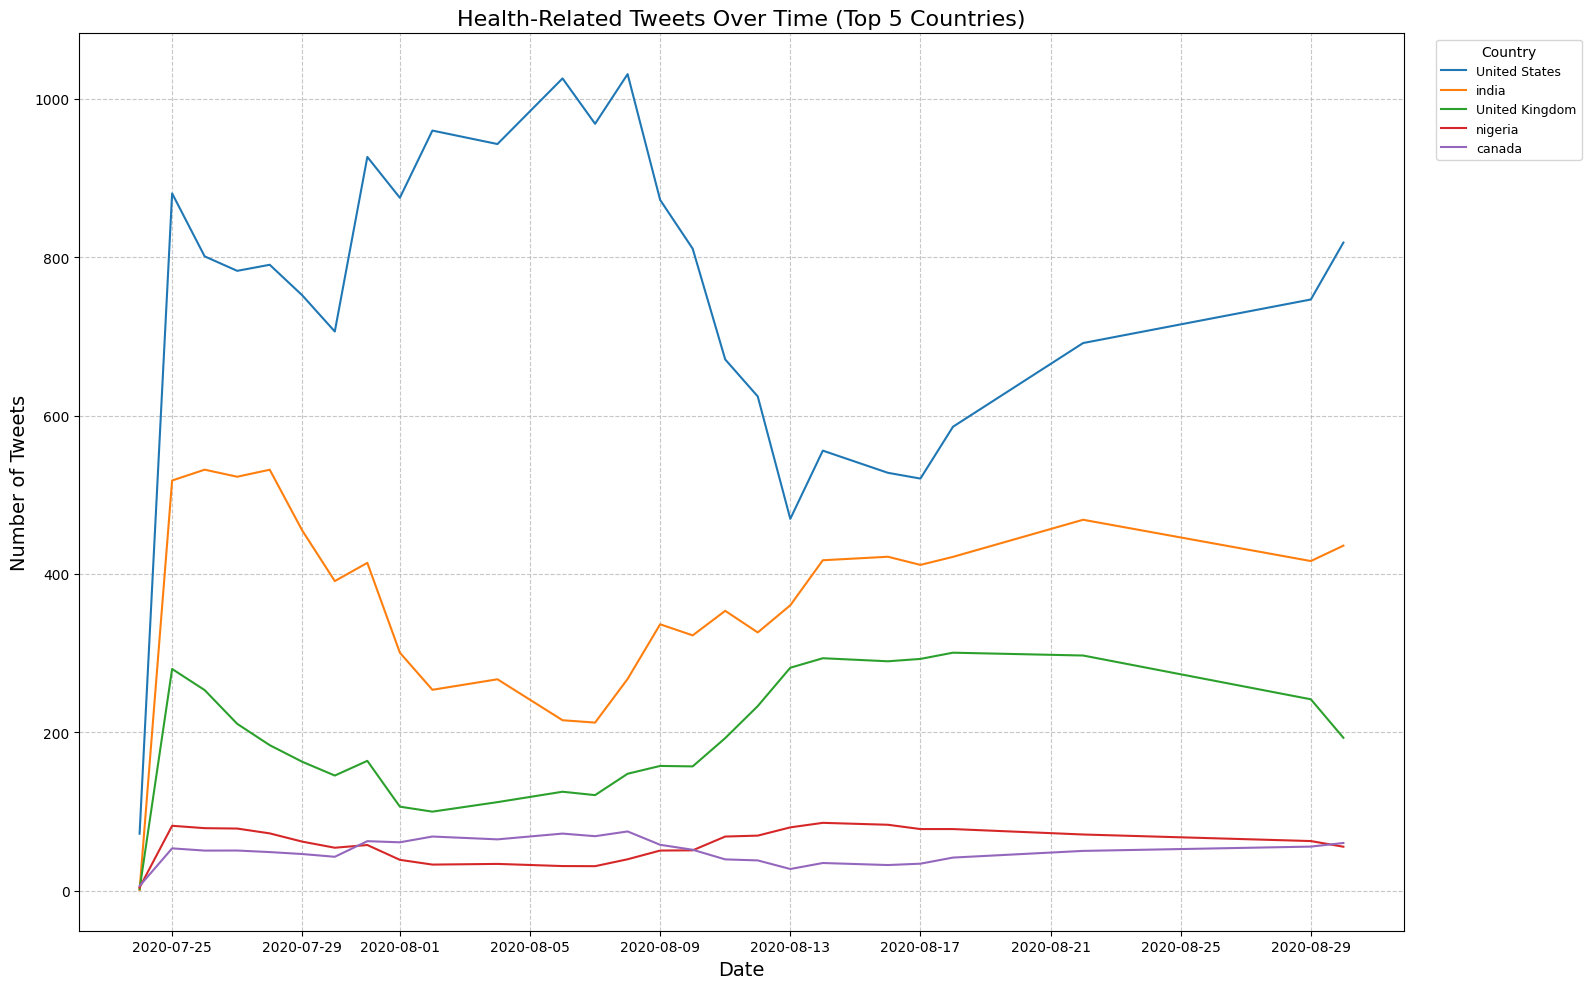

In [78]:
# Exclude rows where the country is marked as 'unknown'
data_tweet = data_tweet[data_tweet['country'] != 'unknown']

# Group and count tweets by country and date
region_trend = data_tweet.groupby(
    [data_tweet['country'], data_tweet['date'].dt.date]
).size().reset_index(name='count')

# Get top N countries by tweet count
top_n = 5
top_countries = data_tweet['country'].value_counts().head(top_n).index

# Filter data to include only the top countries
region_trend_filtered = region_trend[region_trend['country'].isin(top_countries)]

# Plot smoothed tweet trends
plt.figure(figsize=(16, 10))

for country in top_countries:
    country_data = region_trend_filtered[region_trend_filtered['country'] == country]
    country_data_sorted = country_data.sort_values('date')
    smoothed_counts = country_data_sorted['count'].rolling(window=7, min_periods=1).mean()
    
    plt.plot(country_data_sorted['date'], smoothed_counts, label=country)

plt.title(f'Health-Related Tweets Over Time (Top {top_n} Countries)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Tweets', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Country', fontsize=9, loc='upper left', bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()

We excluded the "unknown" category from the visualization because it does not represent a specific country and provides no meaningful insight into regional trends. Including it would introduce noise into the analysis and could mislead interpretation by inflating tweet counts without geographic relevance.

## Word Clouds

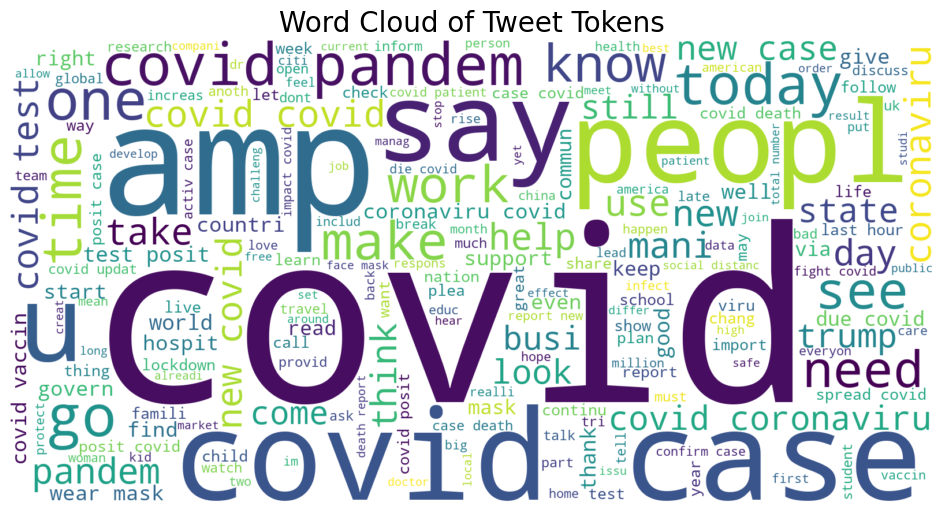

In [82]:
# Flatten all tokens into a single list of words
all_tokens = [token for tokens in data_tweet['tokens'].dropna() for token in tokens]

# Join all tokens into one big string
all_text = ' '.join(all_tokens)

# Generate the word cloud
wordcloud = WordCloud(width=1600, height=800, background_color='white', colormap='viridis').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweet Tokens', fontsize=20)
plt.show()

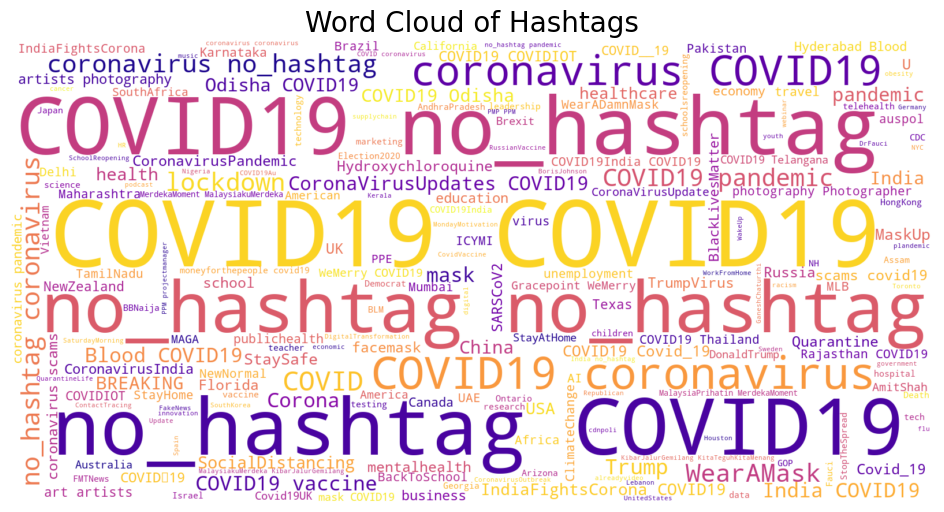

In [83]:
# list to collect all hashtags
all_hashtags = []

# Iterate through the 'hashtags' column and extract hashtags
for item in data_tweet['hashtags'].dropna():
    if isinstance(item, list):
        # If the item is already a list, extend the main list
        all_hashtags.extend(item)
    elif isinstance(item, str):
        try:
            # If it's a string, try converting it to a list safely
            hashtags_list = literal_eval(item)
            if isinstance(hashtags_list, list):
                all_hashtags.extend(hashtags_list)
        except:
            # Skip any rows that cause errors during parsing
            continue

# Combine all hashtags into a single string
hashtags_text = ' '.join(all_hashtags)

# Generate the word cloud for hashtags
wordcloud = WordCloud(
    width=1600,
    height=800,
    background_color='white',
    colormap='plasma'
).generate(hashtags_text)

# Plot 
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Hashtags', fontsize=20)
plt.show()

## N-Gram Analysis

In [85]:
# Join all cleaned text into one list of documents
docs = data_tweet['clean_text'].dropna().astype(str).tolist()

# Use CountVectorizer to extract trigrams
vectorizer = CountVectorizer(ngram_range=(3, 3))  
X = vectorizer.fit_transform(docs)

# frequencies
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Convert to DataFrame
top_ngrams = pd.DataFrame(words_freq[:20], columns=['Trigrams', 'Frequency'])

# Print top 20
print("Top 20 Trigrams:\n",top_ngrams)

Top 20 Trigrams:
                      Trigrams  Frequency
0              new covid case        663
1            test posit covid        573
2             need blood type        287
3           blood compon need        283
4          compon need plasma        281
5           slow spread covid        255
6            covid posit case        251
7            help slow spread        227
8              new case covid        195
9          identifi risk case        193
10      spread covid identifi        192
11        covid identifi risk        192
12           report new covid        192
13            india last hour        191
14           risk case sooner        190
15             case amp death        189
16     case sooner selfreport        188
17  sooner selfreport symptom        185
18   selfreport symptom daili        184
19         symptom daili even        184


# Sentiment Analysis

## NLP Approach with CountVectorizer and Naïve Bayes

In [91]:
# Use VADER to generate sentiment labels 
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply to clean_text column
data_tweet['sentiment'] = data_tweet['clean_text'].astype(str).apply(get_sentiment)

# Prepare features and labels
X = data_tweet['clean_text'].astype(str)
y = data_tweet['sentiment'].astype(str)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text vectorization
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train Naïve Bayes
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Predict
y_pred = model.predict(X_test_vec)

# Show first predictions with text
results = pd.DataFrame({
    'clean_text': X_test,
    'predicted_sentiment': y_pred
})
print(" First 15 Predictions:")
print(results.head(15))

 First 15 Predictions:
                                               clean_text predicted_sentiment
26506   ug student sign train expect govt medic colleg...             Neutral
98481   bdnmb mayor join emerg coordin brian kay provi...            Positive
50073   fabul freak fabul thing friday last day juli d...            Negative
81369   late updat coronaviru covid uae youarerespons ...             Neutral
123171  theminefield episod ingratitud gratitud ordena...             Neutral
98396   assam among deceas kamrup metropolitan distric...             Neutral
99902   pray student teacher amp parent today first da...            Positive
51971                                        covid approv             Neutral
46673            join tuesday pm live present covid small            Positive
154838   covid enviorn like relationship zero space covid            Positive
138921  talk summersid pei covid ozark tigerk eltonjoh...             Neutral
108364  write week ago everyth see forese

# Evaluation

In [93]:

# using accuracy, precision, recall, and F1-score.
print("\nEvaluation Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Neutral', 'Positive']))


Evaluation Metrics:
Accuracy: 0.8401838831800974

Classification Report:
              precision    recall  f1-score   support

    Negative       0.79      0.77      0.78      3383
     Neutral       0.93      0.85      0.89      6703
    Positive       0.77      0.88      0.82      4706

    accuracy                           0.84     14792
   macro avg       0.83      0.83      0.83     14792
weighted avg       0.85      0.84      0.84     14792



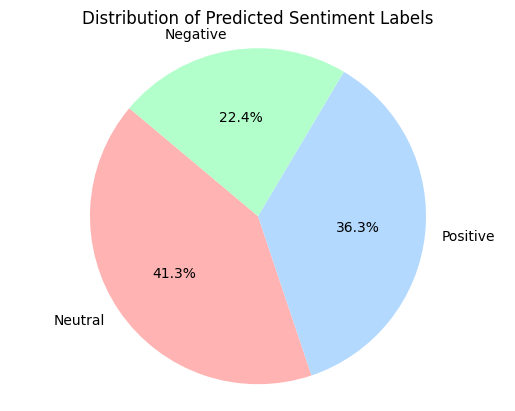

In [96]:
sentiment_counts = results['predicted_sentiment'].value_counts()

# pie chart 
colors = ['#ffb3b3',  
          '#b3d9ff',  
          '#b3ffcc']  

plt.pie(sentiment_counts, 
        labels=sentiment_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors)

plt.title('Distribution of Predicted Sentiment Labels')
plt.axis('equal')
plt.show()

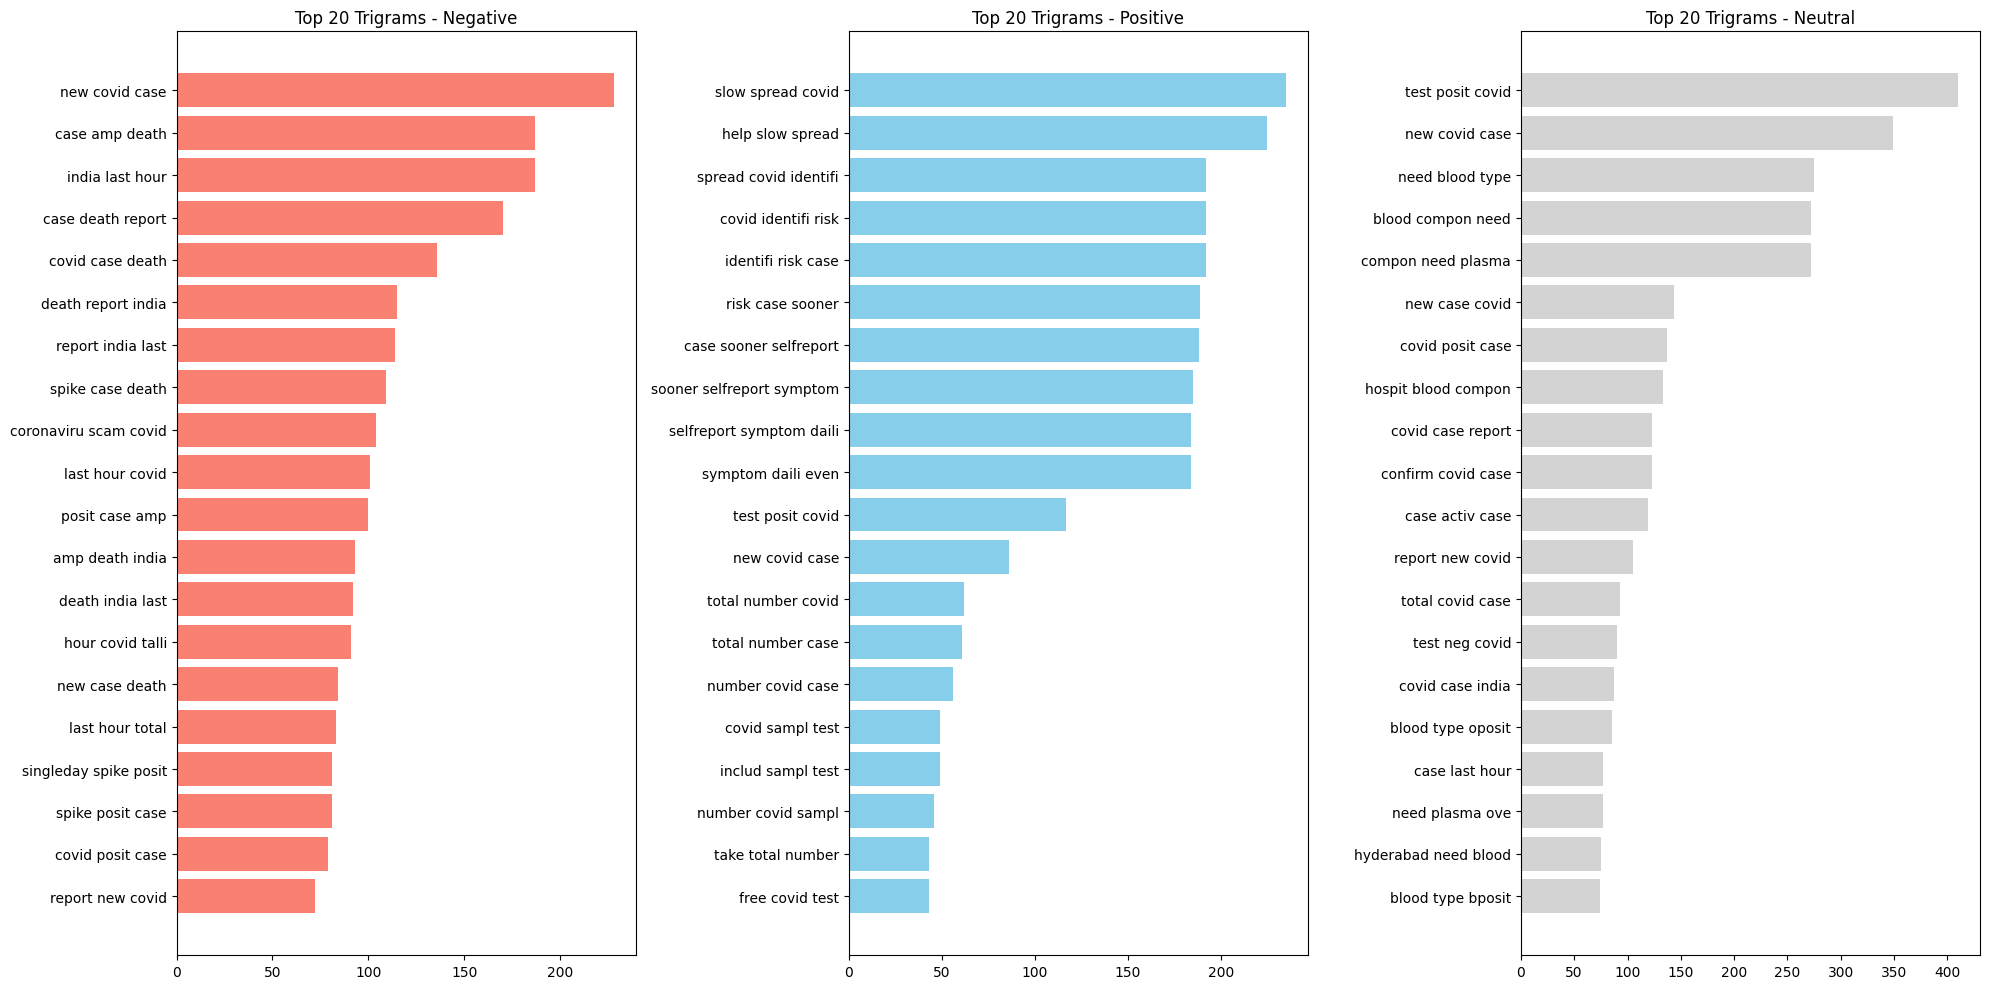

In [98]:
# spilt data
positive_docs = data_tweet[data_tweet['sentiment'] == 'Positive']['clean_text'].dropna().astype(str).tolist()
negative_docs = data_tweet[data_tweet['sentiment'] == 'Negative']['clean_text'].dropna().astype(str).tolist()
neutral_docs  = data_tweet[data_tweet['sentiment'] == 'Neutral']['clean_text'].dropna().astype(str).tolist()

# function to extract top n trigrams 
def get_top_ngrams(docs, n=20):
    vectorizer = CountVectorizer(ngram_range=(3, 3))
    X = vectorizer.fit_transform(docs)
    sum_words = X.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return pd.DataFrame(words_freq[:n], columns=['Trigrams', 'Frequency'])

# extract each label 
top_pos = get_top_ngrams(positive_docs)
top_neg = get_top_ngrams(negative_docs)
top_neu = get_top_ngrams(neutral_docs)


fig, axes = plt.subplots(1, 3, figsize=(20, 10))

# Negative
axes[0].barh(top_neg['Trigrams'], top_neg['Frequency'], color='salmon')
axes[0].set_title('Top 20 Trigrams - Negative')
axes[0].invert_yaxis()

# Positive
axes[1].barh(top_pos['Trigrams'], top_pos['Frequency'], color='skyblue')
axes[1].set_title('Top 20 Trigrams - Positive')
axes[1].invert_yaxis()

# Neutral
axes[2].barh(top_neu['Trigrams'], top_neu['Frequency'], color='lightgrey')
axes[2].set_title('Top 20 Trigrams - Neutral')
axes[2].invert_yaxis()

plt.tight_layout()
plt.show()

# Topic Modeling

## Latent Dirichlet Allocation (LDA)

In [101]:
health_tweets.head()

,text,date,user_location,hashtags,tokens,clean_text,has_arabic,has_health_keywords
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,2020-07-25 12:27:14,"Pewee Valley, KY",[COVID19],"[trump, never, claim, covid, hoax, claim, effort]",trump never claim covid hoax claim effort,False,True
3,@brookbanktv The one gift #COVID19 has give me...,2020-07-25 12:27:10,Stuck in the Middle,[COVID19],"[one, gift, covid, give, appreci, simpl, thing...",one gift covid give appreci simpl thing alway ...,False,True
4,25 July : Media Bulletin on Novel #CoronaVirus...,2020-07-25 12:27:08,Jammu and Kashmir,"[CoronaVirusUpdates, COVID19]","[juli, medium, bulletin, novel, coronavirusupd...",juli medium bulletin novel coronavirusupd covid,False,True
5,#coronavirus #covid19 deaths continue to rise....,2020-07-25 12:27:06,Новоро́ссия,"[coronavirus, covid19]","[coronaviru, covid, death, continu, rise, almo...",coronaviru covid death continu rise almost bad...,False,True
6,How #COVID19 Will Change Work in General (and ...,2020-07-25 12:27:03,"Gainesville, FL","[COVID19, Recruiting]","[covid, chang, work, gener, recruit, specif, via]",covid chang work gener recruit specif via,False,True


In [102]:
# Get tokenized text 
texts = health_tweets['tokens'].dropna().tolist()

# Create dictionary and corpus for LDA
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Train LDA model
num_topics = 5  # topics number
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, random_state=42)

# Print topics
print("\nTop words in each topic:")
for idx, topic in lda_model.print_topics(num_words=10):
    print(f"Topic {idx + 1}: {topic}")


Top words in each topic:
Topic 1: 0.102*"covid" + 0.086*"case" + 0.054*"new" + 0.051*"death" + 0.028*"coronaviru" + 0.025*"report" + 0.021*"total" + 0.021*"india" + 0.015*"updat" + 0.013*"last"
Topic 2: 0.073*"covid" + 0.065*"test" + 0.028*"august" + 0.024*"help" + 0.023*"spread" + 0.018*"posit" + 0.016*"risk" + 0.012*"symptom" + 0.011*"student" + 0.011*"even"
Topic 3: 0.118*"covid" + 0.017*"mask" + 0.011*"peopl" + 0.010*"get" + 0.009*"pandem" + 0.009*"go" + 0.008*"coronaviru" + 0.008*"wear" + 0.008*"u" + 0.008*"like"
Topic 4: 0.119*"covid" + 0.013*"coronaviru" + 0.012*"pandem" + 0.012*"read" + 0.011*"impact" + 0.009*"need" + 0.009*"health" + 0.008*"late" + 0.007*"vaccin" + 0.006*"amp"
Topic 5: 0.103*"covid" + 0.017*"health" + 0.010*"die" + 0.008*"hospit" + 0.008*"american" + 0.008*"amp" + 0.007*"say" + 0.007*"patient" + 0.007*"watch" + 0.007*"pandem"


We applied LDA to health-related tweets, grouping frequently co-occurring words into 5 topics. Each topic is a distribution of words, where top words help interpret its theme for example, one focuses on COVID-19 statistics (e.g., covid, case, death), another on public safety (e.g., mask, wear, people). We chose 5 topics to strike a balance between granularity and clarity, allowing meaningful insights without overcomplicating the results.

## Visualizing Topic Trends and Distributions

## Topic Trends

In [121]:
# Define readable topic labels
topic_labels = {
    0: "COVID Statistics",
    1: "Testing & Prevention",
    2: "Safety Practices",
    3: "Pandemic Impact & Awareness",
    4: "Healthcare System & Outcomes"
}

In [123]:
# Assign dominant topic to each tweet 
dominant_topics = [max(lda_model[doc], key=lambda x: x[1])[0] for doc in corpus]
health_tweets = health_tweets.copy()
health_tweets['dominant_topic'] = dominant_topics

# Group by date and dominant topic, then reshape
topic_trend = health_tweets.groupby([health_tweets['date'].dt.date, 'dominant_topic']).size().unstack(fill_value=0)

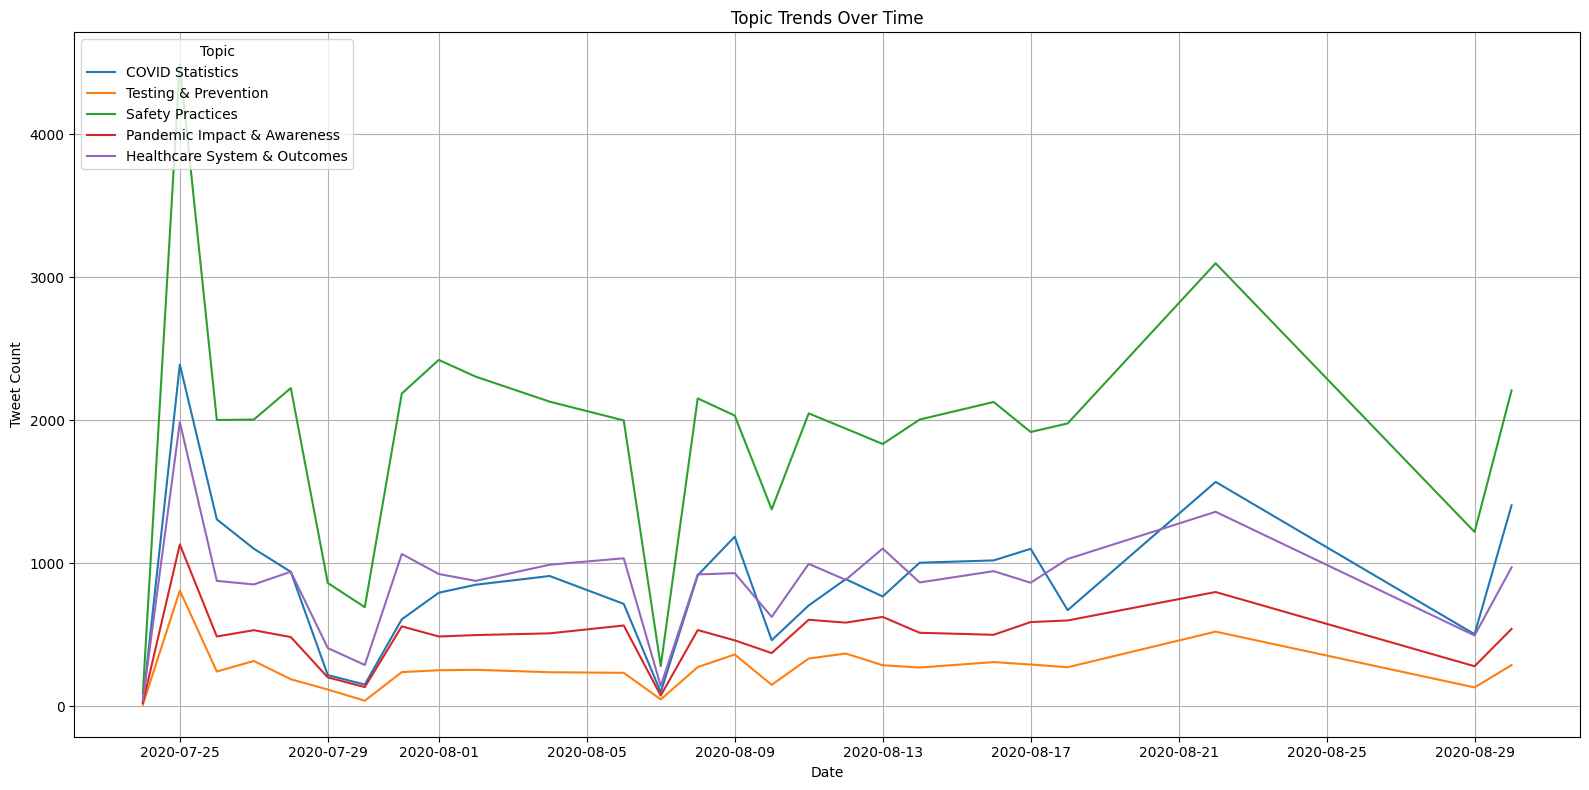

In [124]:
# Plot topic trends over time with custom labels
plt.figure(figsize=(16, 8))
for topic_id in topic_trend.columns:
    label = topic_labels.get(topic_id, f"Topic {topic_id + 1}")
    plt.plot(topic_trend.index, topic_trend[topic_id], label=label)

plt.title("Topic Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Tweet Count")
plt.legend(title="Topic", loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

This analysis applied LDA to identify key topics in health-related tweets. The topic trends over time show how public discussions evolved, highlighting shifts in attention toward issues such as COVID-19 statistics, public safety, and testing. Notably, the frequency of certain topics peaked during specific periods, indicating possible public reactions to real-world events. These insights can support better understanding of public concerns and inform health communication strategies.

## Topic Distributions

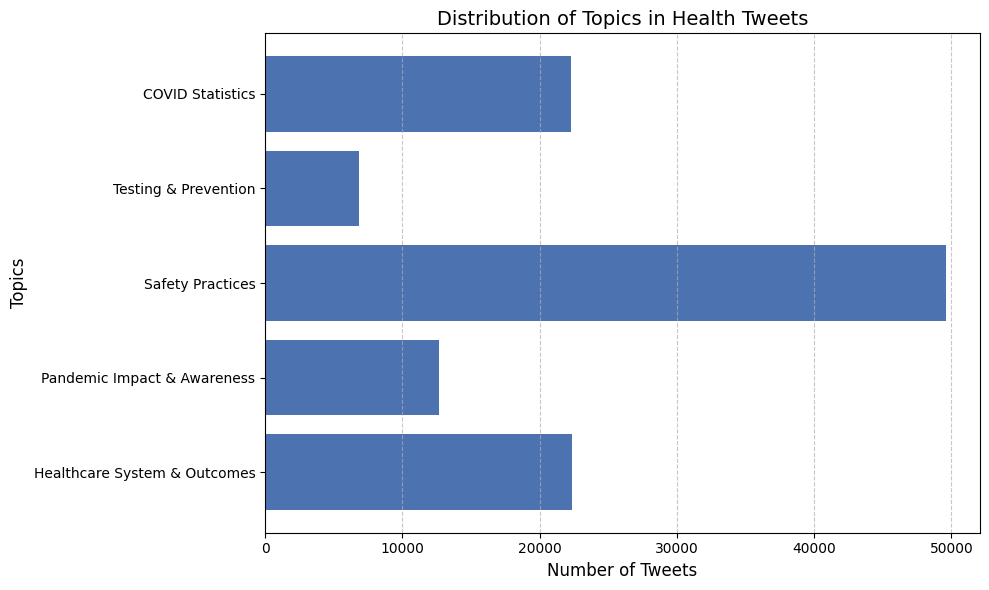

In [127]:
# Count the number of dominant topics
topic_counts = Counter(dominant_topics)

# Sort results by topic number
sorted_counts = sorted(topic_counts.items())

# Use descriptive labels instead of "Topic 1", "Topic 2", etc.
topics = [topic_labels.get(i, f"Topic {i+1}") for i, _ in sorted_counts]
counts = [count for _, count in sorted_counts]

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(topics, counts, color='#4c72b0')
plt.title("Distribution of Topics in Health Tweets", fontsize=14)
plt.xlabel("Number of Tweets", fontsize=12)
plt.ylabel("Topics", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # To show top topic first
plt.tight_layout()
plt.show()

## Conclusion




This project successfully applied various sentiment analysis techniques, including preprocessing, exploratory analysis, modeling,
and topic extraction, on public health-related tweets. The analysis revealed key trends, such as the public’s concern with medical research, 
pandemic impacts, and safety measures. The model used, Naïve Bayes, achieved solid accuracy levels, showing the system’s ability to classify 
sentiments effectively. These insights can support early detection of health concerns and guide future public communication strategies.

